# Logistic Regression (Regressão Logística)
## Table of Contents
* [Bibliotecas](#Bibliotecas-(Libraries))
* [Leitura dos Dados](#Leitura-dos-Dados)
* [Regressão Logística](#Regressão-Logística)
* [Análise de Erro](#Análise-de-Erro)
* [Retreinando o Modelo](#Retreinando-o-Modelo)
* [Criando o Resultado das Previsões para Importar ao Kaggle](#Criando-o-Resultado-das-Previsões-para-Importar-ao-Kaggle)

## Bibliotecas (Libraries)

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

## Leitura dos Dados
Lendo o training e o test set, e conferindo as suas dimensões.

In [11]:
X_train_pre, X_test = pd.read_csv('../data/preprocessed/train.csv'), pd.read_csv('../data/preprocessed/test.csv')
print(f'Train set shape: {X_train_pre.shape}\nTest set shape: {X_test.shape}')

Train set shape: (891, 29)
Test set shape: (418, 28)


Lendo os 5 primeiros exemplos do training set.

In [13]:
X_train_pre.head()

,Sex_b,Age_pre,Pclass,Embarked_S,Embarked_C,SibSp,Parch,Fare,Cabin_null,Cabin_C,...,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir,Ticket_num,Ticket_cat,Survived
0,0,22.0,3,1,0,1,0,7.2500,1,0,...,0,0,0,1,0,0,0,21171,0,0
1,1,38.0,1,0,0,1,0,71.2833,0,1,...,0,0,0,1,0,0,0,17599,1,1
2,1,26.0,3,1,0,0,0,7.9250,1,0,...,0,0,0,0,0,0,0,3101282,2,1
3,1,35.0,1,1,0,1,0,53.1000,0,1,...,0,0,0,1,0,0,0,113803,3,1
4,0,35.0,3,1,0,0,0,8.0500,1,0,...,0,0,0,1,0,0,0,373450,4,0


Separando as features $X$ e o target $y$ para a criação do modelo.

In [15]:
y = X_train_pre['Survived'].copy()
X = X_train_pre.drop(columns=['Survived'], axis=1).copy()

## Regressão Logística
Criando, treinando o modelo no fold do training set e avaliando o modelo nos folds de training e dev set.

As avaliações no training e dev set estão sendo adicionadas em uma lista para depois serem plotadas.

In [17]:
kf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)

scaler = StandardScaler()

step_train = []
step_cv = []
i = 0

for linhas_train, linhas_cv in kf.split(X):
    X_train, X_cv = X.iloc[linhas_train].copy(), X.iloc[linhas_cv].copy()
    y_train, y_cv = y.iloc[linhas_train].copy(), y.iloc[linhas_cv].copy()

    X_train = scaler.fit_transform(X_train)
    X_cv = scaler.transform(X_cv)

    model = LogisticRegression(penalty='l2', random_state=42)
    model.fit(X_train, y_train)

    yhat_train = model.predict(X_train)
    yhat_cv = model.predict(X_cv)
    acc_train = np.mean(y_train == yhat_train)
    acc_cv = np.mean(y_cv == yhat_cv)
    
    if i % 10 == 0:
        print(f'acc_train: {acc_train:.4f}, acc_cv: {acc_cv:.4f}\n')

    step_train.append(acc_train)
    step_cv.append(acc_cv)
    i += 1

print(f'{"=" * 35}\n\nTrain mean: {np.mean(step_train):.2f}, CV mean: {np.mean(step_cv):.2f}')

acc_train: 0.8300, acc_cv: 0.8182

acc_train: 0.8367, acc_cv: 0.8182

acc_train: 0.8249, acc_cv: 0.8418


Train mean: 0.84, CV mean: 0.82


Plotando o histórico do desempenho no training e no dev set.

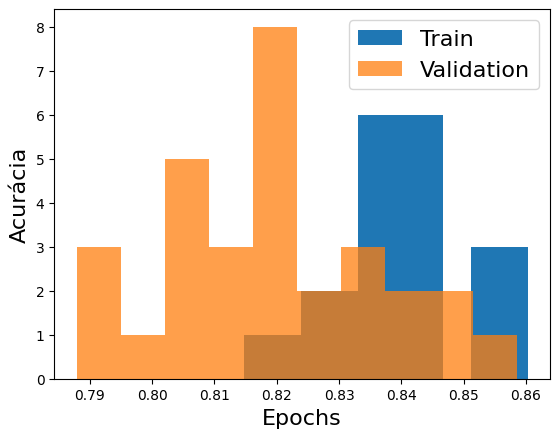

In [19]:
plt.hist(step_train, label='Train')
plt.hist(step_cv, label='Validation', alpha=.75)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Acurácia', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(False)
plt.show()

## Análise de Erro
Executando a análise de erro nas previsões.

In [21]:
train = pd.read_csv('../data/raw/train.csv')
features = [c for c in X_train_pre.columns if c not in train.columns]
train = pd.concat([train, X_train_pre[features]], axis=1)

X_cv_erro = train.loc[linhas_cv].copy()
X_cv_erro['yhat'] = yhat_cv
X_cv_erro.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir,Ticket_num,Ticket_cat,yhat
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,1,0,0,0,347742,8,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,0,0,0,0,0,0,0,113783,11,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,...,1,0,0,0,0,0,0,382652,16,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,...,0,0,0,1,0,0,0,244373,17,0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,...,0,0,0,1,0,0,0,113788,23,0


Definindo as previsões incorretas e, definindo e ordenando as features para leitura do dataset.

In [23]:
erro = X_cv_erro[X_cv_erro['Survived'] != X_cv_erro['yhat']]
erro = erro[['Survived', 'yhat', 'Name', 'Cabin', 'Embarked', 'Sex', 'Sex_b', 'Age', 'Age_pre', 'Pclass', 'Embarked_S',
             'Embarked_C', 'SibSp', 'Parch', 'Fare', 'Cabin_null',
             'Cabin_C', 'Cabin_E', 'Cabin_G', 'Cabin_D', 'Cabin_A', 'Cabin_B', 'Cabin_F', 'Cabin_T',
             'Name_Miss', 'Name_Mrs', 'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr', 'Name_Dr', 'Name_Don', 'Name_Sir']]
erro.head()

,Survived,yhat,Name,Cabin,Embarked,Sex,Sex_b,Age,Age_pre,Pclass,...,Cabin_T,Name_Miss,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir
17,1,0,"Williams, Mr. Charles Eugene",NaN,S,male,0,NaN,29.0,2,...,0,0,0,0,0,0,1,0,0,0
23,1,0,"Sloper, Mr. William Thompson",A6,S,male,0,28.0,28.0,1,...,0,0,0,0,0,0,1,0,0,0
25,1,0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",NaN,S,female,1,38.0,38.0,3,...,0,0,1,0,0,0,1,0,0,0
49,0,1,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",NaN,S,female,1,18.0,18.0,3,...,0,0,1,0,0,0,1,0,0,0
68,1,0,"Andersson, Miss. Erna Alexandra",NaN,S,female,1,17.0,17.0,3,...,0,1,0,0,0,0,0,0,0,0


Separando os erros entre a classe `male` e `female`.

In [25]:
female = erro[erro['Sex_b'] == 1]
male = erro[erro['Sex_b'] == 0]

Ordenando os erros da classe `female` pelo target $y$.

In [27]:
female.sort_values('Survived')

,Survived,yhat,Name,Cabin,Embarked,Sex,Sex_b,Age,Age_pre,Pclass,...,Cabin_T,Name_Miss,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir
49,0,1,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",NaN,S,female,1,18.0,18.0,3,...,0,0,1,0,0,0,1,0,0,0
111,0,1,"Zabour, Miss. Hileni",NaN,C,female,1,14.5,14.5,3,...,0,1,0,0,0,0,0,0,0,0
114,0,1,"Attalah, Miss. Malake",NaN,C,female,1,17.0,17.0,3,...,0,1,0,0,0,0,0,0,0,0
113,0,1,"Jussila, Miss. Katriina",NaN,S,female,1,20.0,20.0,3,...,0,1,0,0,0,0,0,0,0,0
132,0,1,"Robins, Mrs. Alexander A (Grace Charity Laury)",NaN,S,female,1,47.0,47.0,3,...,0,0,1,0,0,0,1,0,0,0
140,0,1,"Boulos, Mrs. Joseph (Sultana)",NaN,C,female,1,NaN,29.0,3,...,0,0,1,0,0,0,1,0,0,0
254,0,1,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",NaN,S,female,1,41.0,41.0,3,...,0,0,1,0,0,0,1,0,0,0
235,0,1,"Harknett, Miss. Alice Phoebe",NaN,S,female,1,NaN,29.0,3,...,0,1,0,0,0,0,0,0,0,0
404,0,1,"Oreskovic, Miss. Marija",NaN,S,female,1,20.0,20.0,3,...,0,1,0,0,0,0,0,0,0,0
402,0,1,"Jussila, Miss. Mari Aina",NaN,S,female,1,21.0,21.0,3,...,0,1,0,0,0,0,0,0,0,0


Ordenando os erros da classe `male` pelo target $y$.

In [29]:
male.sort_values('Survived')

,Survived,yhat,Name,Cabin,Embarked,Sex,Sex_b,Age,Age_pre,Pclass,...,Cabin_T,Name_Miss,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir
245,0,1,"Minahan, Dr. William Edward",C78,Q,male,0,44.0,44.0,1,...,0,0,0,0,0,0,0,1,0,0
373,0,1,"Ringhini, Mr. Sante",NaN,C,male,0,22.0,22.0,1,...,0,0,0,0,0,0,1,0,0,0
505,0,1,"Penasco y Castellana, Mr. Victor de Satode",C65,C,male,0,18.0,18.0,1,...,0,0,0,0,0,0,1,0,0,0
527,0,1,"Farthing, Mr. John",C95,S,male,0,NaN,29.0,1,...,0,0,0,0,0,0,1,0,0,0
662,0,1,"Colley, Mr. Edward Pomeroy",E58,S,male,0,47.0,47.0,1,...,0,0,0,0,1,0,1,0,0,0
766,0,1,"Brewe, Dr. Arthur Jackson",NaN,C,male,0,NaN,29.0,1,...,0,0,0,0,0,0,0,1,0,0
557,0,1,"Robbins, Mr. Victor",NaN,C,male,0,NaN,29.0,1,...,0,0,0,0,0,0,1,0,0,0
17,1,0,"Williams, Mr. Charles Eugene",NaN,S,male,0,NaN,29.0,2,...,0,0,0,0,0,0,1,0,0,0
288,1,0,"Hosono, Mr. Masabumi",NaN,S,male,0,42.0,42.0,2,...,0,0,0,0,0,0,1,0,0,0
209,1,0,"Blank, Mr. Henry",A31,C,male,0,40.0,40.0,1,...,0,0,0,0,0,0,1,0,0,0


## Retreinando o Modelo
Retreinando o modelo final no dataset completo.

Escalonando o training e o test set.

In [32]:
final_caler = StandardScaler()

X = final_caler.fit_transform(X)
X_test = final_caler.transform(X_test)

Criação, treinamento do modelo no training set e previsão final no test set.

In [34]:
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X, y)

y_hat = model.predict(X_test)

## Criando o Resultado das Previsões para Importar ao Kaggle
Criando o dataset com as previsões finais do test set.

In [36]:
test = pd.read_csv('../data/raw/test.csv')

result = pd.Series(y_hat, index=test['PassengerId'], name='Survived')
result

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    0
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64

Exportando o dataset com as previsões finais do test set.

In [38]:
result.to_csv('../yhat/logistic_regression.csv', header=True)